In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#import sklearn

In [38]:
housing=pd.read_csv('housing.csv')

In [39]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [40]:
a=housing.describe
print(a)

<bound method NDFrame.describe of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population

In [41]:
housing.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [42]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


Initial Observations
1. only total_bedrooms has null values
2. only ocean_proximity is a categorical variable

In [43]:
cat_cols=['ocean_proximity']
num_cols=housing.columns.drop(cat_cols)
print(num_cols)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')


Exploratory data analysis

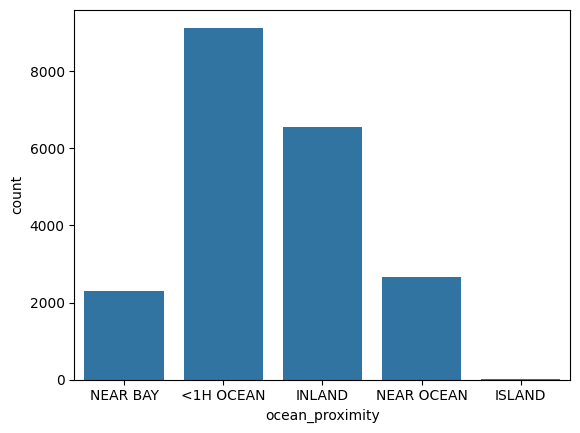

In [44]:
for i in cat_cols:
    plt.figure()
    sns.countplot(housing,x=i)

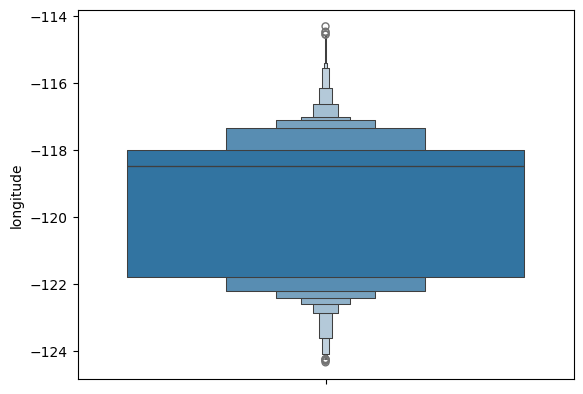

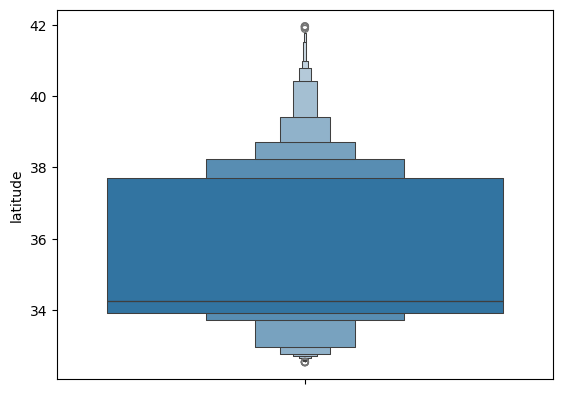

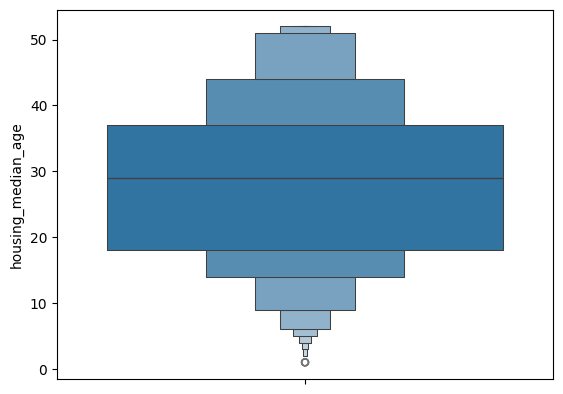

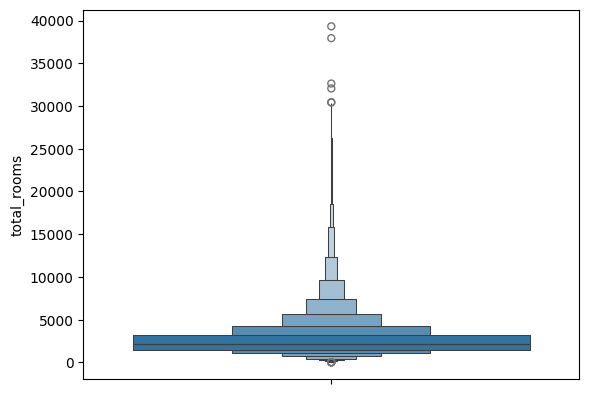

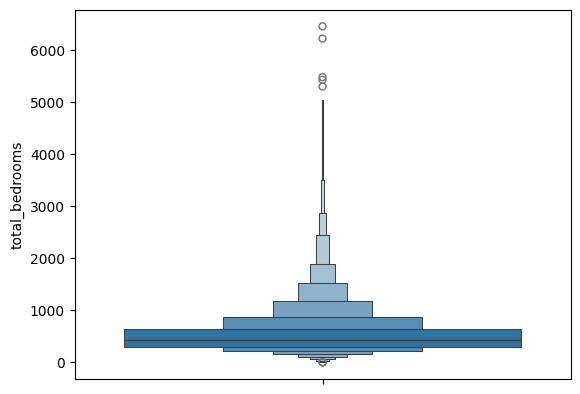

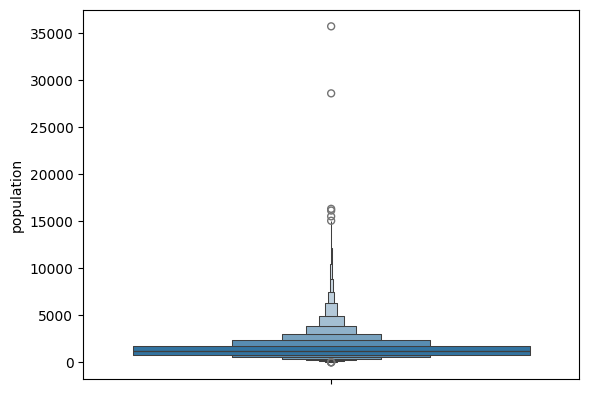

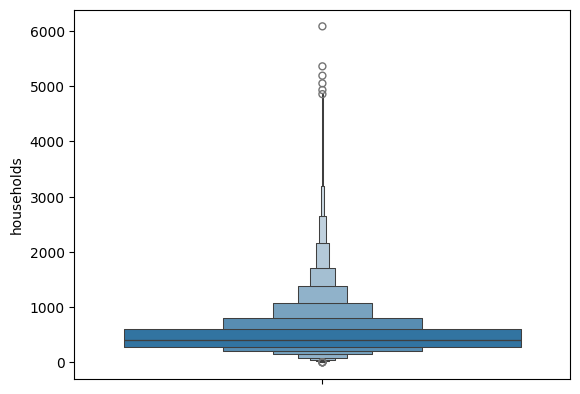

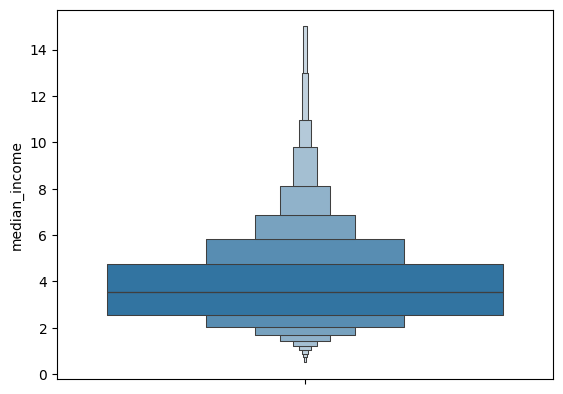

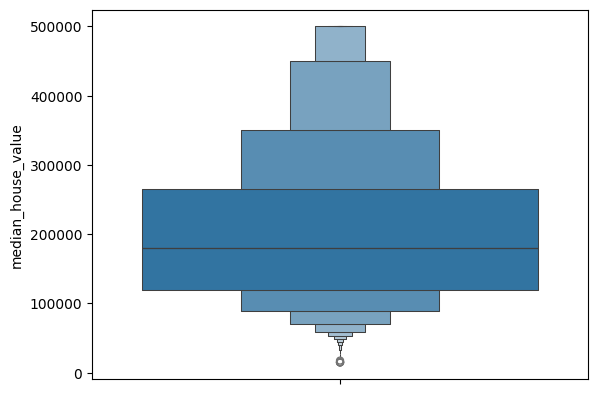

In [45]:
for i in num_cols:
    plt.figure()
    sns.boxenplot(housing, y=i)

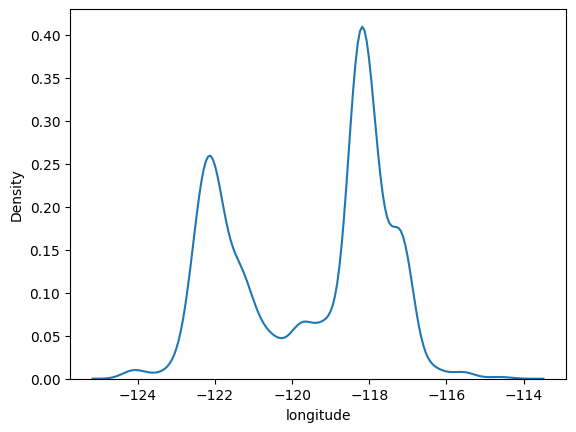

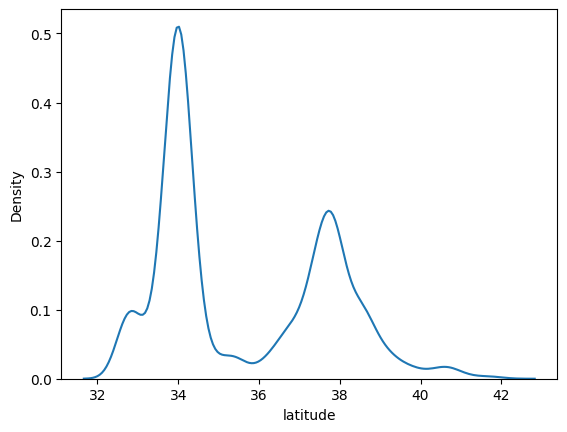

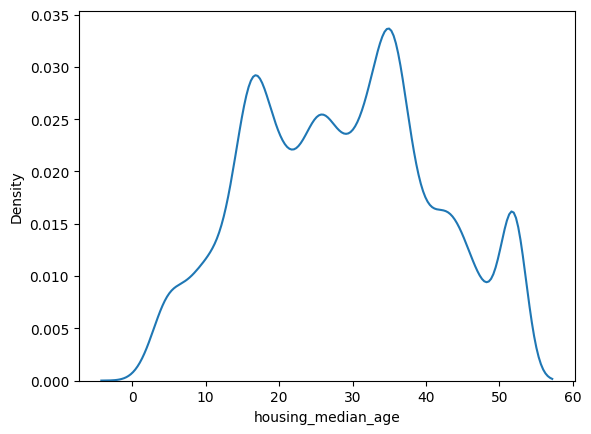

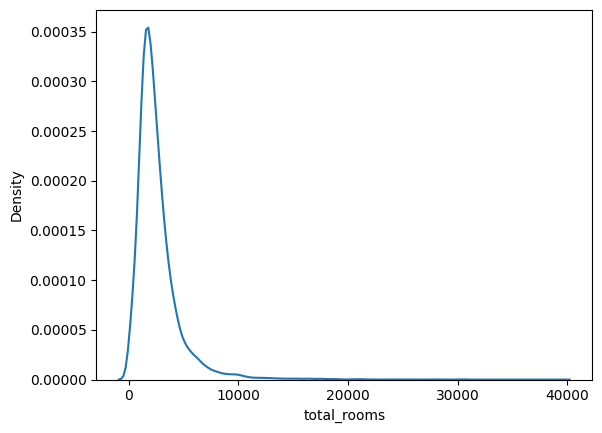

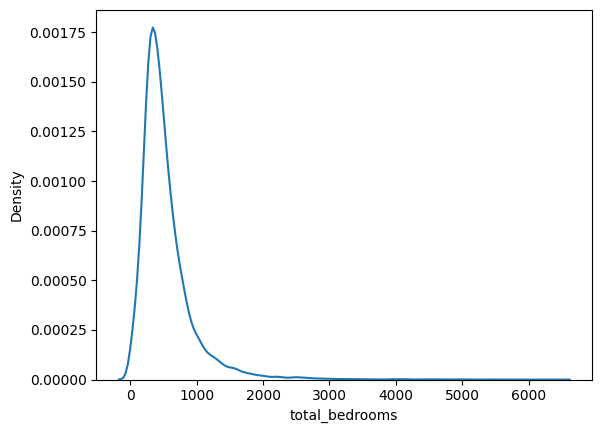

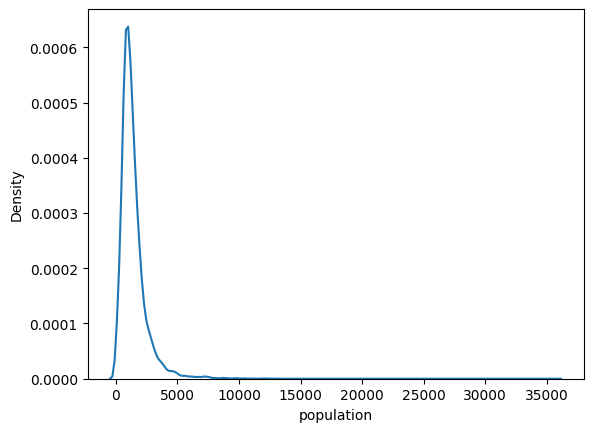

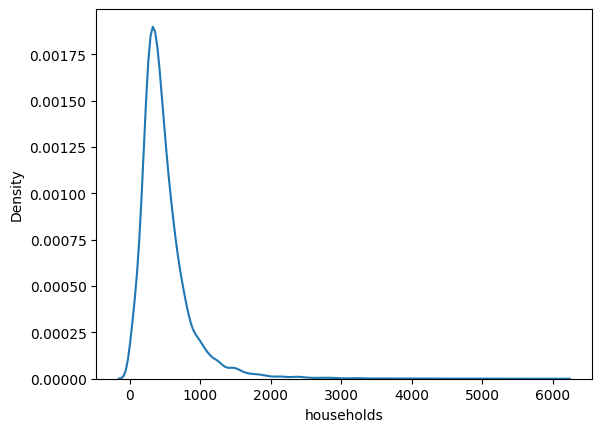

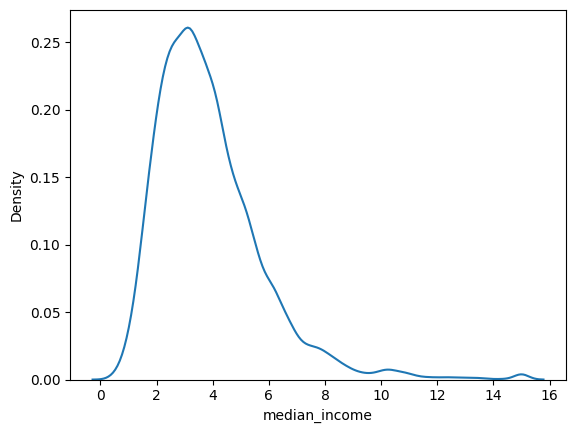

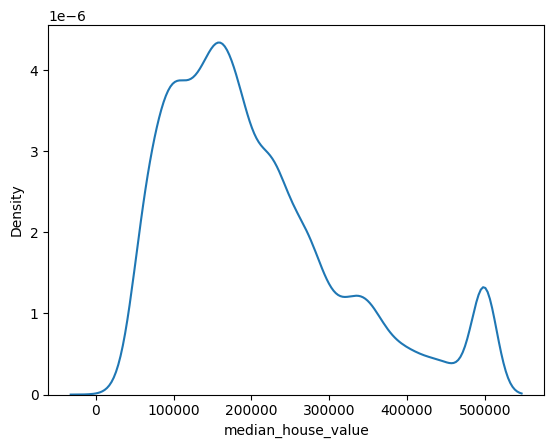

In [46]:
for i in num_cols:
    plt.figure()
    sns.kdeplot(housing, x=i)

1. Output median_house_value is roughly normally distributed
2. Median age and median income are normally distributed features 
3. Total rooms, total bedrooms, total population, households 
4. longitude and latitude features need deeper understanding 

In [47]:
housing['longitude'].value_counts

<bound method IndexOpsMixin.value_counts of 0       -122.23
1       -122.22
2       -122.24
3       -122.25
4       -122.25
          ...  
20635   -121.09
20636   -121.21
20637   -121.22
20638   -121.32
20639   -121.24
Name: longitude, Length: 20640, dtype: float64>

Convert latitude and longitude to categorical variables by cutting the continuous dataset 

In [48]:
latbins = pd.cut(housing.latitude, 4, labels=[f'lat{k}' for k in range(1,4+1)], retbins=True)
longbins = pd.cut(housing.longitude, 4, labels=[f'long{k}' for k in range(1,4+1)], retbins=True)


In [49]:
print(longbins[0])

0        long1
1        long1
2        long1
3        long1
4        long1
         ...  
20635    long2
20636    long2
20637    long2
20638    long2
20639    long2
Name: longitude, Length: 20640, dtype: category
Categories (4, object): ['long1' < 'long2' < 'long3' < 'long4']


In [50]:
housing['geog_bins'] = [f'{latbins[0][row]}_{longbins[0][row]}' for row in housing.index]

BIVARIATE EDA

Data processing 
1. Fill in empty values for total_bedrooms - with median not mean since they are not normally distributed
2. we will use one hot encoding for the categorical columns 
3. we will use robust scaling since numerical columns are not normally distributed


In [51]:
output_cols='median_house_value'

In [52]:
num_cols=num_cols.drop(['latitude', 'longitude', output_cols])
num_cols

Index(['housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
       'households', 'median_income'],
      dtype='object')

In [53]:
cat_cols.append('geog_bins')

In [54]:
cat_cols

['ocean_proximity', 'geog_bins']

In [55]:
housing['total_bedrooms'].fillna(housing['total_bedrooms'].median(), inplace=True)

In [56]:
hcorr=housing[num_cols+output_cols].corr()

KeyError: "None of [Index(['housing_median_agemedian_house_value', 'total_roomsmedian_house_value',\n       'total_bedroomsmedian_house_value', 'populationmedian_house_value',\n       'householdsmedian_house_value', 'median_incomemedian_house_value'],\n      dtype='object')] are in the [columns]"